# Wheat Variety Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d sudhanshu2198/wheat-variety-classification

Dataset URL: https://www.kaggle.com/datasets/sudhanshu2198/wheat-variety-classification
License(s): CC0-1.0
  0%|                                               | 0.00/3.79k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.79k/3.79k [00:00<00:00, 16.9MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Wheat Variety Classification/wheat-variety-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Wheat Variety Classification')
zip_ref.close()

## Explratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('wheat.csv')

In [5]:
df.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [7]:
df.shape

(210, 8)

In [9]:
df.size

1680

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    float64
dtypes: float64(8)
memory usage: 13.3 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
groove length,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
category,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [10]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry coefficient    0
groove length            0
category                 0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

area                     193
perimeter                170
compactness              186
length                   188
width                    184
asymmetry coefficient    207
groove length            148
category                   3
dtype: int64

## Data Visualization

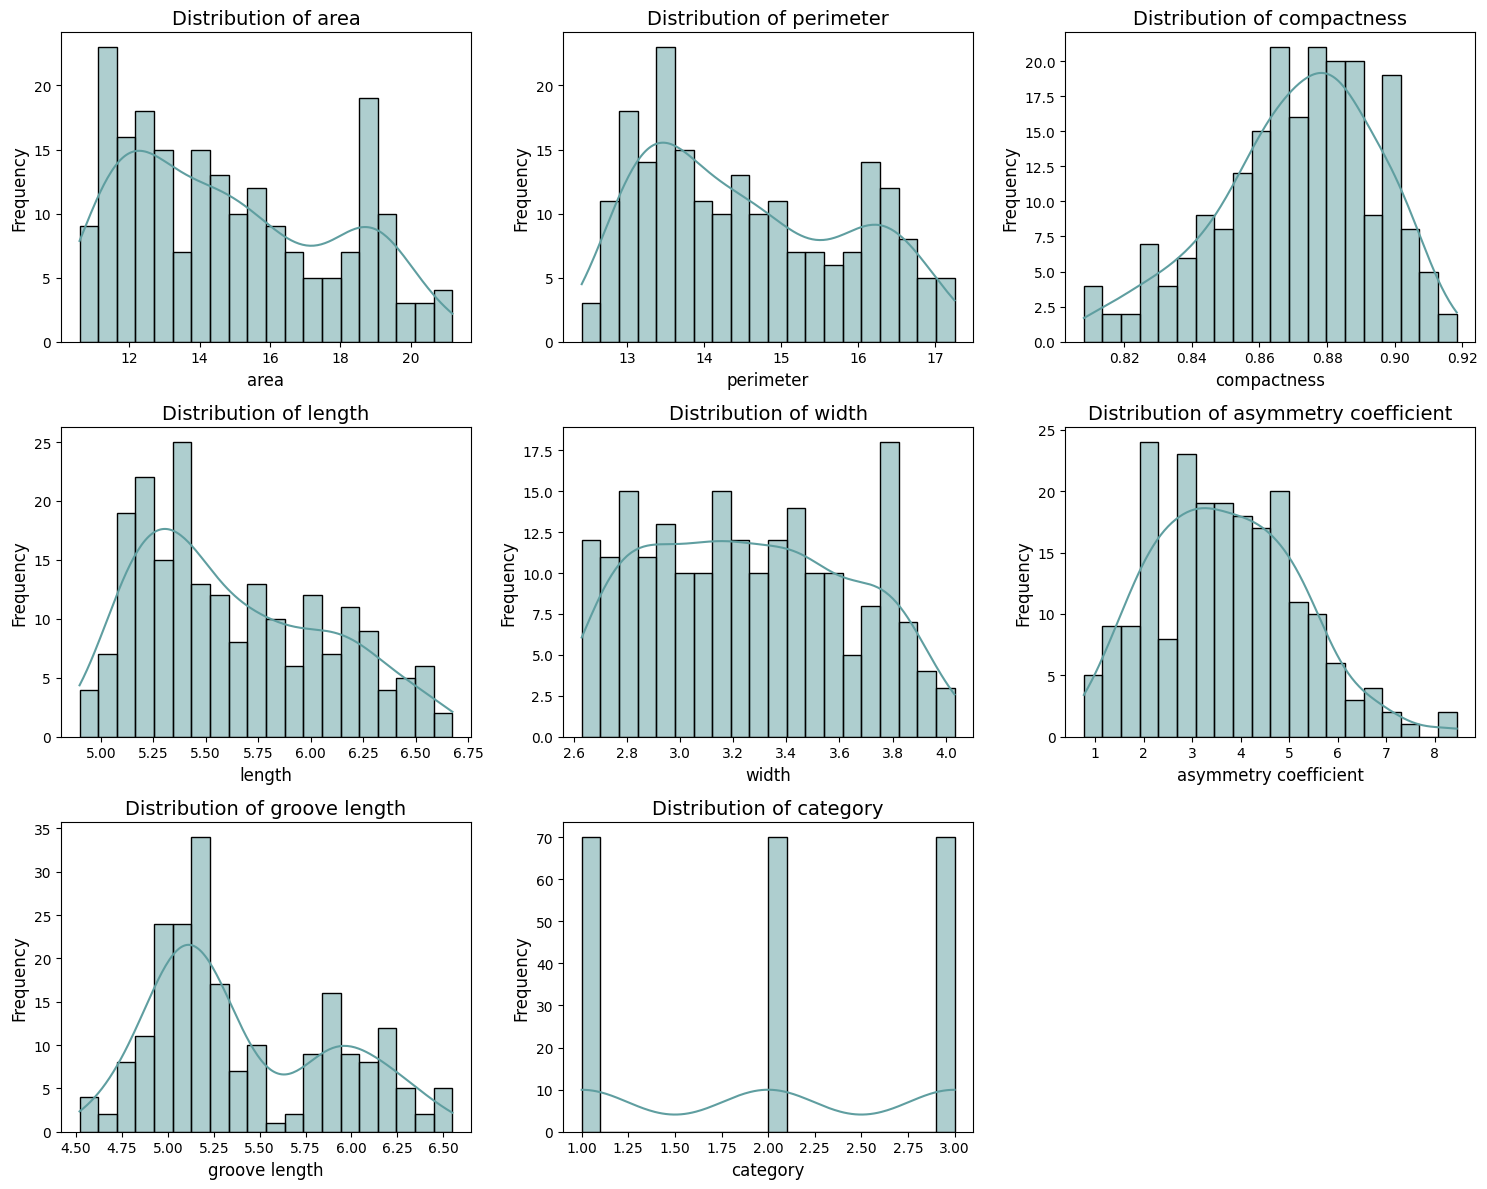

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

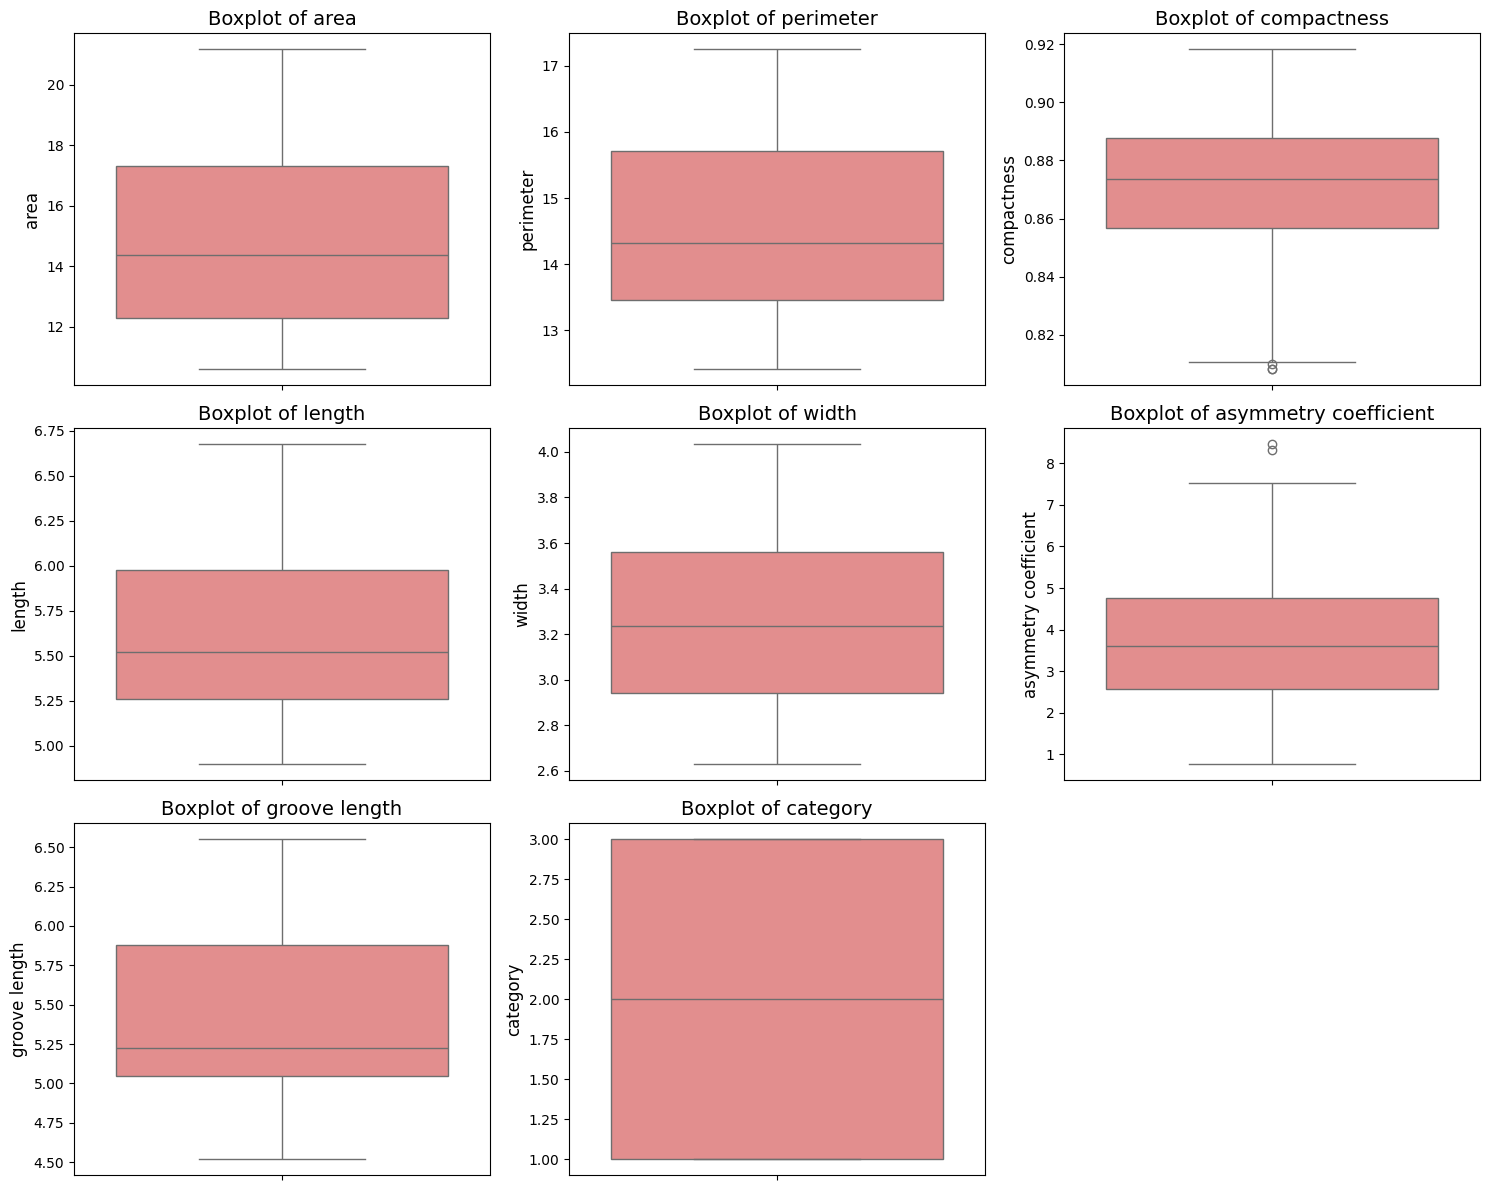

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

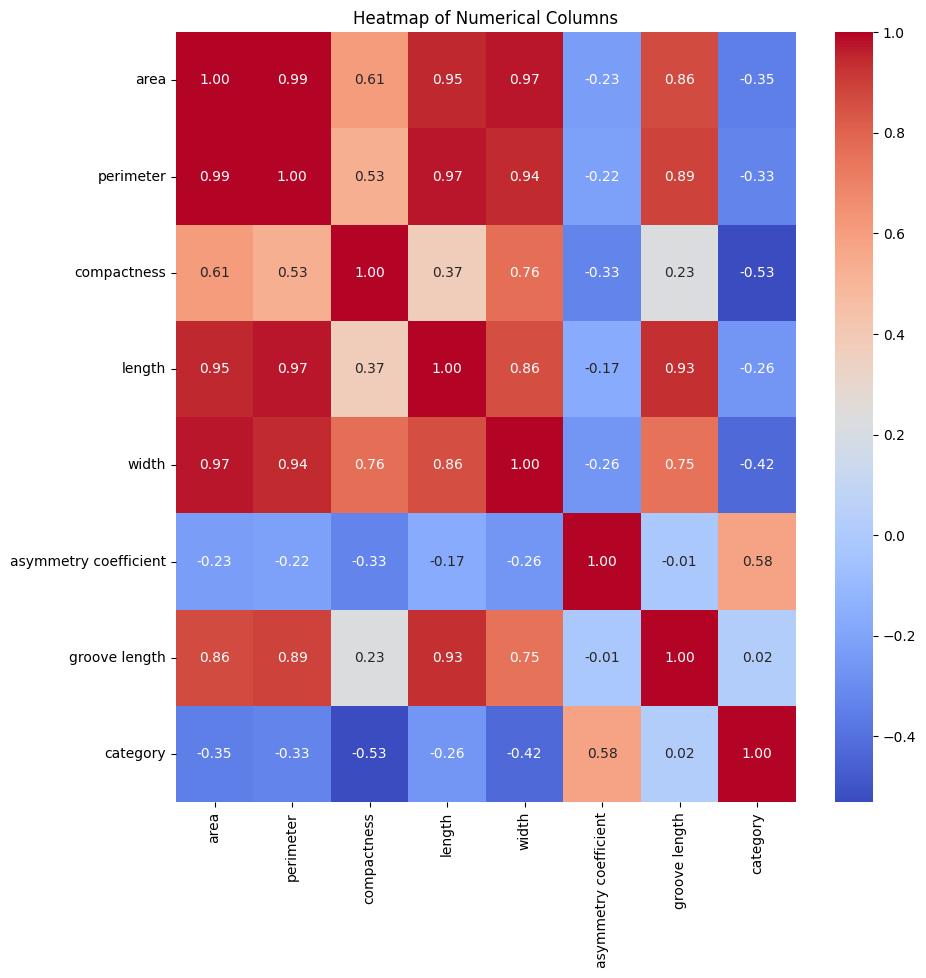

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [22]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [23]:
X = df.drop(columns=['category'])
y = df['category']

In [24]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [25]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [27]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8809523809523809, 0.8809523809523809, 0.8809523809523809, 0.8809523809523809, 0.8333333333333334, 0.9285714285714286, 0.8809523809523809, 0.8333333333333334, 0.9047619047619048]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.86      0.86      0.86        14
           2       0.94      0.94      0.94        17

    accuracy                           0.88        42
   macro avg       0.87      0.87      0.87        42
weighted avg       0.88      0.88      0.88        42

Confusion Matrix:
 [[ 9  1  1]
 [ 2 12  0]
 [ 0  1 16]]


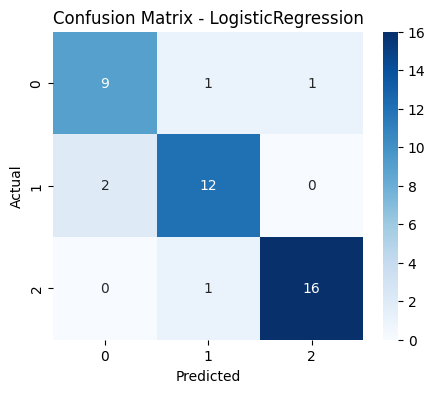

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       1.00      1.00      1.00        14
           2       0.93      0.76      0.84        17

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.90      0.88      0.88        42

Confusion Matrix:
 [[10  0  1]
 [ 0 14  0]
 [ 4  0 13]]


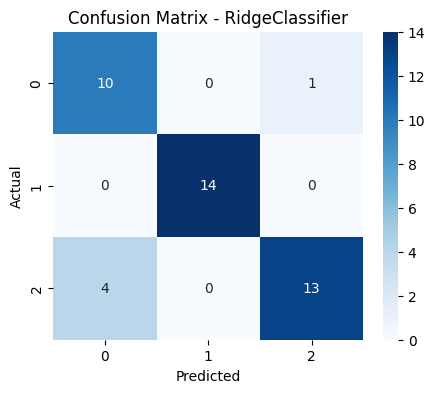

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       1.00      1.00      1.00        14
           2       0.93      0.76      0.84        17

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.90      0.88      0.88        42

Confusion Matrix:
 [[10  0  1]
 [ 0 14  0]
 [ 4  0 13]]


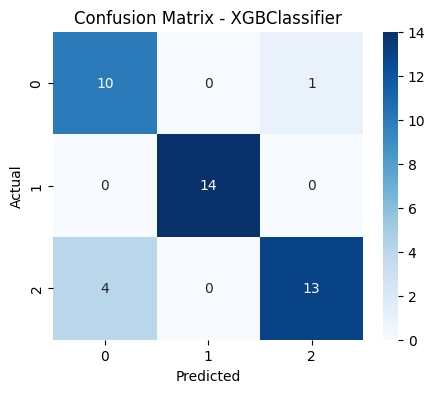

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      1.00      1.00        14
           2       0.88      0.82      0.85        17

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

Confusion Matrix:
 [[ 9  0  2]
 [ 0 14  0]
 [ 3  0 14]]


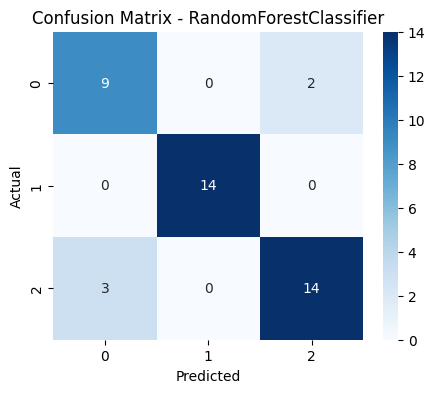

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       1.00      1.00      1.00        14
           2       0.86      0.71      0.77        17

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42

Confusion Matrix:
 [[ 9  0  2]
 [ 0 14  0]
 [ 5  0 12]]


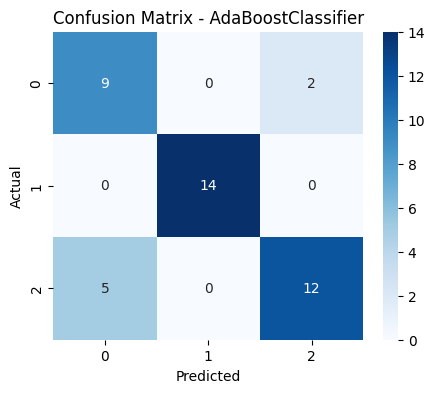

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.93      0.96        14
           2       1.00      0.88      0.94        17

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42

Confusion Matrix:
 [[11  0  0]
 [ 1 13  0]
 [ 2  0 15]]


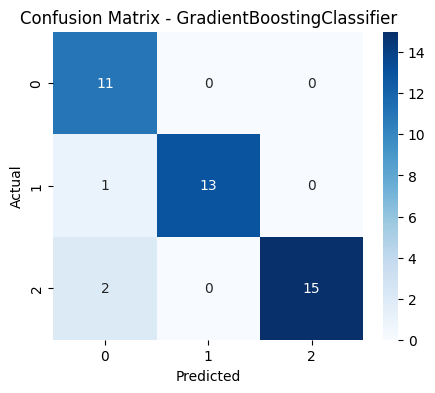

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       1.00      1.00      1.00        14
           2       0.94      0.94      0.94        17

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42

Confusion Matrix:
 [[10  0  1]
 [ 0 14  0]
 [ 1  0 16]]


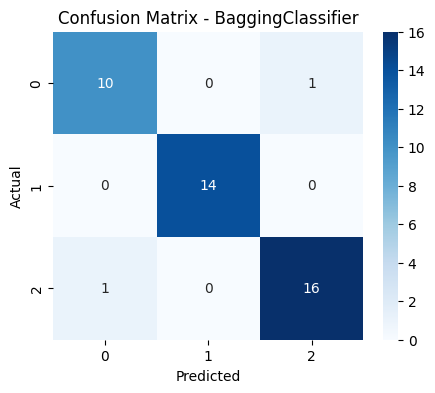

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       1.00      1.00      1.00        14
           2       0.93      0.82      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42

Confusion Matrix:
 [[10  0  1]
 [ 0 14  0]
 [ 3  0 14]]


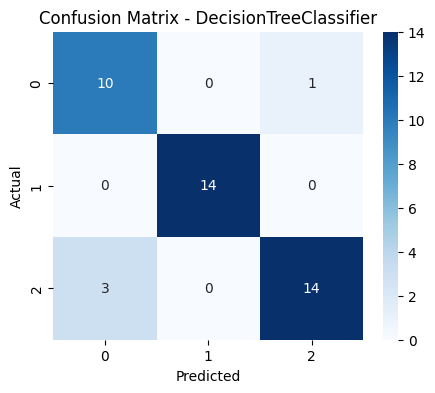

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       1.00      1.00      1.00        14
           2       0.93      0.82      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42

Confusion Matrix:
 [[10  0  1]
 [ 0 14  0]
 [ 3  0 14]]


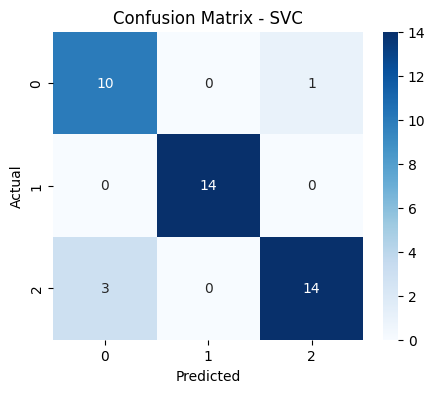

In [28]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()